In [1]:
import pandas as pd

# Load metadata.csv
df = pd.read_csv("metadata.csv")

C:\Users\kalum\AppData\Local\Temp\ipykernel_18988\2535705311.py:4: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("metadata.csv")


In [2]:
# First few rows
print(df.head())

   cord_uid                                       sha source_x  \
0  ug7v899j  d1aafb70c066a2068b02786f8929fd9c900897fb      PMC   
1  02tnwd4m  6b0567729c2143a66d737eb0a2f63f2dce2e5a7d      PMC   
2  ejv2xln0  06ced00a5fc04215949aa72528f2eeaae1d58927      PMC   
3  2b73a28n  348055649b6b8cf2b9a376498df9bf41f7123605      PMC   
4  9785vg6d  5f48792a5fa08bed9f56016f4981ae2ca6031b32      PMC   

                                               title                    doi  \
0  Clinical features of culture-proven Mycoplasma...  10.1186/1471-2334-1-6   
1  Nitric oxide: a pro-inflammatory mediator in l...           10.1186/rr14   
2    Surfactant protein-D and pulmonary host defense           10.1186/rr19   
3               Role of endothelin-1 in lung disease           10.1186/rr44   
4  Gene expression in epithelial cells in respons...           10.1186/rr61   

      pmcid pubmed_id license  \
0  PMC35282  11472636   no-cc   
1  PMC59543  11667967   no-cc   
2  PMC59549  11667972   no-cc

In [3]:
# Dimensions
print("Shape:", df.shape)

Shape: (1056660, 19)


In [4]:
# Data types
print(df.dtypes)

cord_uid             object
sha                  object
source_x             object
title                object
doi                  object
pmcid                object
pubmed_id            object
license              object
abstract             object
publish_time         object
authors              object
journal              object
mag_id              float64
who_covidence_id     object
arxiv_id             object
pdf_json_files       object
pmc_json_files       object
url                  object
s2_id               float64
dtype: object


In [5]:
# Missing values
print(df.isnull().sum().head(20))

cord_uid                  0
sha                  682894
source_x                  0
title                   503
doi                  399880
pmcid                667089
pubmed_id            557728
license                   0
abstract             235544
publish_time           1814
authors               23869
journal               87322
mag_id              1056660
who_covidence_id     573725
arxiv_id            1042411
pdf_json_files       682894
pmc_json_files       740918
url                  369726
s2_id                 80192
dtype: int64


In [6]:
# Stats for numeric columns
print(df.describe())

       mag_id         s2_id
count     0.0  9.764680e+05
mean      NaN  2.175871e+08
std       NaN  5.312281e+07
min       NaN  9.600000e+01
25%       NaN  2.211411e+08
50%       NaN  2.320829e+08
75%       NaN  2.373948e+08
max       NaN  2.491936e+08


## Part 2: Data Cleaning and Preparation 


In [7]:
# Drop columns with too many missing values (example: >90% missing)
missing_percent = df.isnull().mean() * 100
to_drop = missing_percent[missing_percent > 90].index
df_clean = df.drop(columns=to_drop)

# Handle publish_time column
df_clean['publish_time'] = pd.to_datetime(df_clean['publish_time'], errors='coerce')
df_clean['year'] = df_clean['publish_time'].dt.year

# Create abstract word count
df_clean['abstract_word_count'] = df_clean['abstract'].fillna("").apply(lambda x: len(x.split()))


### Part 3: Data Analysis and Visualization

In [17]:
!pip install wordcloud


In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


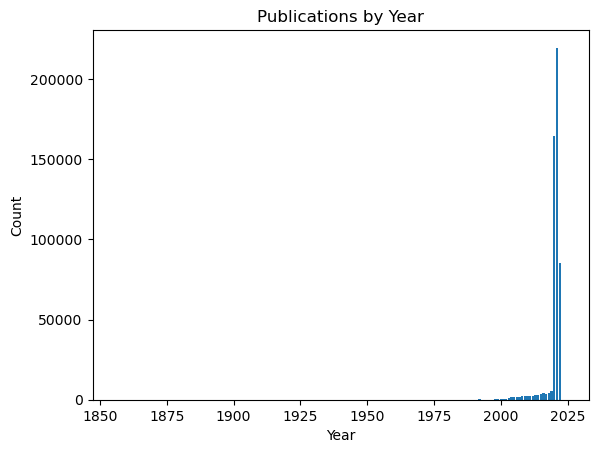

In [19]:
# Publications by year
year_counts = df_clean['year'].value_counts().sort_index()
plt.bar(year_counts.index, year_counts.values)
plt.title("Publications by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

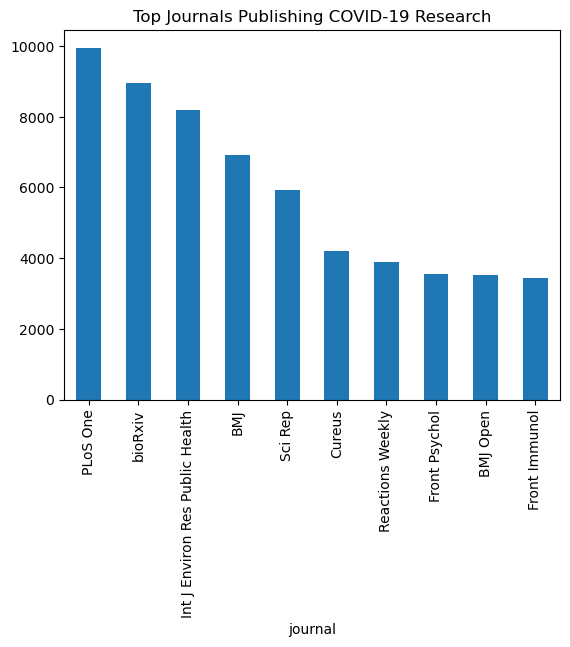

In [20]:
# Top journals
top_journals = df_clean['journal'].value_counts().head(10)
top_journals.plot(kind="bar")
plt.title("Top Journals Publishing COVID-19 Research")
plt.show()

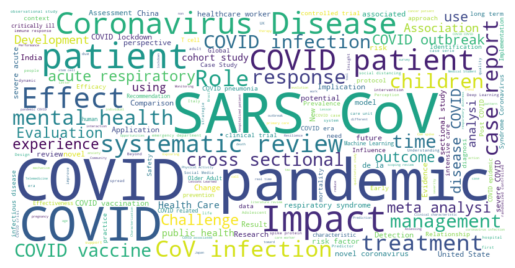

In [22]:
# Word frequency in titles
titles = " ".join(df_clean['title'].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(titles)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [26]:
# Publications over time
year_counts = filtered['year'].value_counts().sort_index()
fig, ax = plt.subplots()
ax.bar(year_counts.index, year_counts.values)
ax.set_title("Publications by Year")
st.pyplot(fig)

DeltaGenerator()

In [27]:
!pip install streamlit
